In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import confusion_matrix

In [2]:
spamdata = np.genfromtxt("newData.txt",delimiter=",")
X, Y = spamdata[:,0:7883], spamdata[:,-1]

## Feature Selection - SelectFromModel

In [5]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000).fit(X, Y)
model = SelectFromModel(logreg, prefit=True)
X_new = model.transform(X)
Xtr, Xte, Ytr, Yte = train_test_split(X_new, Y, test_size=0.3, shuffle=True, random_state=1)

clf = LogisticRegression(tol=1e-8, C=0.1, random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000).fit(Xtr,Ytr)
print("features:\t",X_new.shape)
print("training score:\t", clf.score(Xtr,Ytr))
print("test score:\t", clf.score(Xte,Yte))

features:	 (12452, 2304)
training score:	 0.9915098669114273
test score:	 0.985813704496788


In [8]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.25, shuffle = True)

logreg = LogisticRegression(tol=1e-8, C=10.0, random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000)
clf = logreg.fit(Xtr,Ytr)

print("Training score:\t", clf.score(Xtr,Ytr))
print("Test score:\t", clf.score(Xte,Yte))

Yhat = clf.predict(Xte)
err = 0
for i in range(len(Xte)):
    if Yhat[i] != Yte[i]:
        err += 1
print("Error rate: ", err/len(Xte))

Training score:	 1.0
Test score:	 0.982653389013813
Error rate:  0.017346610986186957


In [12]:
print("Ham Messages: ", len(np.where(Yte == 0)[0]))
print("Ham Prediction: ", len(np.where(Yhat == 0)[0]))
print("Spam Messages: ", len(np.where(Yte == 1)[0]))
print("Spam Prediction: ", len(np.where(Yhat == 1)[0]))
confusion_matrix(Yte, Yhat)

Ham Messages:  2223
Ham Prediction:  2223
Spam Messages:  890
Spam Prediction:  890


array([[2196,   27],
       [  27,  863]])

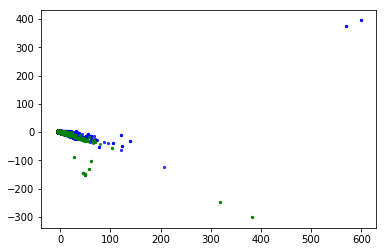

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

colors = ['b','g','r']

for i,c in enumerate(np.unique(Y)):
    mask=np.where(Y==c)[0] 
    plt.scatter(Xpca[mask,0],Xpca[mask,1],s=5,c=colors[i],alpha=0.75)
plt.show()